<img src="autoencodeur_gans_page_de_garde.png" alt="Page de garde" style="display: block; margin-left: auto; margin-right: auto; width: 100%;" />

# AUTOENCODEURS / GANs - GENERATION ET RECONSTITUTION DE DONNEES
### Etude de cas : Machine Learning with Alzheimer dataset using GAN
**Source** : https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset

# **Contexte**


La maladie d'Alzheimer est une maladie neurodégénérative progressive qui affecte la mémoire, la pensée et le comportement. Un diagnostic précoce et précis est crucial pour une prise en charge optimale et pour la recherche de traitements, étant donné l'absence actuelle de remède. Distinguer les stades de la maladie ou l'absence de démence est essentiel pour la recherche et l'amélioration de la qualité de vie des patients.

Ce projet utilise un dataset synthétique riche, conçu pour explorer les facteurs liés à l'Alzheimer et développer des modèles prédictifs. Il contient une variété de caractéristiques : démographiques, comportementales, cliniques et liées aux habitudes de vie. Cela inclut l'âge, les antécédents familiaux, le niveau d'éducation, le tabagisme, l'activité physique, l'alimentation, le sommeil, la tension artérielle, le cholestérol, ainsi que les scores d'évaluation cognitive (MMSE, ADL) et divers symptômes.

Chaque entrée dans le dataset représente un patient, décrit par ces caractéristiques. La variable cible est le diagnostic de la maladie d'Alzheimer, qui sera traitée comme une tâche de classification (présence ou absence de la maladie, ou ses différents stades).

L'objectif de ce projet est de développer des modèles de prédiction précis capables d'utiliser les caractéristiques fournies pour anticiper avec justesse le diagnostic de la maladie d'Alzheimer. Ces modèles pourraient potentiellement aider les professionnels de la santé à prendre des décisions éclairées, en identifiant rapidement les individus à risque ou ceux nécessitant une évaluation médicale approfondie. En conséquence, cela pourrait contribuer à améliorer la détection précoce de la maladie et la qualité de vie des patients affectés.

# **Problématique**



Face à la complexité et à la nature progressive de la maladie d'Alzheimer, un diagnostic précoce et précis reste un défi majeur. Les données cliniques et comportementales des patients étant multiples et hétérogènes, comment peut-on développer un modèle de Deep Learning capable d'extraire efficacement les informations pertinentes de ces nombreuses caractéristiques pour prédire de manière fiable le diagnostic d'Alzheimer, en s'appuyant sur une représentation de données plus compacte et optimisée ?

# **Analyse descriptive**

In [13]:
# Importation des librairies
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn as sk 

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn import metrics 

In [14]:
# Chargement du dataset
data = pd.read_csv("alzheimers_disease_data.csv", header=0)
# data = pd.read_csv("Students_Social_Media_Addiction.csv", header=0)

In [15]:
# Aperçu du dataset (affiche les 3 premières lignes)
data.head(5)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


## Description des attributs

Ce dataset contient des informations détaillées pour 2 149 patients, chaque variable offrant un aperçu unique sur les facteurs associés à la maladie d'Alzheimer.

### A. Informations Patient :
1.  **PatientID**: Un identifiant unique assigné à chaque patient (de 4751 à 6900).

### B. Détails Démographiques :
2.  **Age**: L'âge du patient en années, variant de 60 à 90 ans.
3.  **Gender**: Le sexe du patient, où 0 représente Male et 1 représente Female.
4.  **Ethnicity**: L'origine ethnique du patient, codée comme suit : 0 (Caucasien), 1 (Afro-Américain), 2 (Asiatique), 3 (Autre).
5.  **EducationLevel**: Le niveau d'éducation atteint par le patient, codé comme suit : 0 (Aucun), 1 (Lycée), 2 (Licence), 3 (Supérieur).

### C. Facteurs Liés au Mode de Vie :
6.  **BMI**: L'Indice de Masse Corporelle du patient, variant de 15 à 40.
7.  **Smoking**: Statut tabagique du patient, où 0 indique l'absence de tabagisme et 1 indique sa présence.
8.  **AlcoholConsumption**: La consommation hebdomadaire d'alcool du patient en unités, variant de 0 à 20.
9.  **PhysicalActivity**: Le niveau d'activité physique hebdomadaire du patient en heures, variant de 0 à 10.
10. **DietQuality**: Un score de qualité de l'alimentation du patient, variant de 0 à 10.
11. **SleepQuality**: Un score de qualité du sommeil du patient, variant de 4 à 10.

### D. Antécédents Médicaux :
12. **FamilyHistoryAlzheimers**: Indique la présence d'antécédents familiaux de la maladie d'Alzheimer, où 0 indique Non et 1 indique Oui.
13. **CardiovascularDisease**: Indique la présence de maladies cardiovasculaires, où 0 indique Non et 1 indique Oui.
14. **Diabetes**: Indique la présence de diabète, où 0 indique Non et 1 indique Oui.
15. **Depression**: Indique la présence de dépression, où 0 indique Non et 1 indique Oui.
16. **HeadInjury**: Indique des antécédents de traumatisme crânien, où 0 indique Non et 1 indique Oui.
17. **Hypertension**: Indique la présence d'hypertension, où 0 indique Non et 1 indique Oui.

### E. Mesures Cliniques :
18. **SystolicBP**: Pression artérielle systolique du patient, variant de 90 à 180 mmHg.
19. **DiastolicBP**: Pression artérielle diastolique du patient, variant de 60 à 120 mmHg.
20. **CholesterolTotal**: Niveaux de cholestérol total du patient, variant de 150 à 300 mg/dL.
21. **CholesterolLDL**: Niveaux de cholestérol LDL (lipoprotéines de basse densité) du patient, variant de 50 à 200 mg/dL.
22. **CholesterolHDL**: Niveaux de cholestérol HDL (lipoprotéines de haute densité) du patient, variant de 20 à 100 mg/dL.
23. **CholesterolTriglycerides**: Niveaux de triglycérides du patient, variant de 50 à 400 mg/dL.

### F. Évaluations Cognitives et Fonctionnelles :
24. **MMSE**: Score du Mini-Mental State Examination, un test d'évaluation cognitive, variant de 0 à 30 (les scores plus bas indiquent une déficience cognitive).
25. **FunctionalAssessment**: Score d'évaluation fonctionnelle, variant de 0 à 10 (les scores plus bas indiquent une déficience plus importante dans les activités complexes).
26. **MemoryComplaints**: Indique la présence de plaintes de mémoire chez le patient, où 0 indique Non et 1 indique Oui.
27. **BehavioralProblems**: Indique la présence de problèmes comportementaux chez le patient, où 0 indique Non et 1 indique Oui.
28. **ADL (Activities of Daily Living)**: Score des Activités de la Vie Quotidienne, variant de 0 à 10 (les scores plus bas indiquent une déficience plus importante dans les tâches quotidiennes de base).

### G. Symptômes :
29. **Confusion**: Indique la présence de confusion chez le patient, où 0 indique Non et 1 indique Oui.
30. **Disorientation**: Indique la présence de désorientation chez le patient, où 0 indique Non et 1 indique Oui.
31. **PersonalityChanges**: Indique la présence de changements de personnalité chez le patient, où 0 indique Non et 1 indique Oui.
32. **DifficultyCompletingTasks**: Indique la présence de difficultés à accomplir des tâches chez le patient, où 0 indique Non et 1 indique Oui.
33. **Forgetfulness**: Indique la présence d'oublis fréquents chez le patient, où 0 indique Non et 1 indique Oui.

### H. Informations de Diagnostic :
34. **Diagnosis**: Le statut de diagnostic final pour la maladie d'Alzheimer, où 0 indique Non et 1 indique Oui.

### I. Informations confidentielles :
35. **DoctorInCharge**: Cette colonne contient des informations confidentielles sur le médecin responsable, avec la valeur "XXXConfid" pour tous les patients.

## Information sur le dataset 

In [16]:
# Prévisualisation des type de données de notre dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

**EXPLICATION**  
Cette méthode fournit un résumé concis du DataFrame :
- Le nombre total de lignes (entrées) et de colonnes (features).
- Le nom de chaque colonne, le nombre de valeurs non nulles (non manquantes) pour chacune, et leur type de données (`int`, `float`, `object`, etc.).
- Le type d\'index utilisé.
- La quantité totale de mémoire utilisée par le DataFrame.

Elle indique également le type de chaque variable (par exemple, `int64` pour les entiers, `float64` pour les décimaux, `object` pour les chaînes de caractères) et combien de variables de chaque type sont présentes dans le dataset.
Dans notre cas, le dataset contient 12 colonnes de type décimal (`float64`) et 22 colonnes de type entier (`int64`).  
Cela permet de repérer rapidement les colonnes avec des valeurs manquantes, de vérifier les types de données pour un prétraitement adapté, et d’avoir une vue d’ensemble de la structure du dataset.


In [17]:
data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

DoctorInCharge est une information confidentiel. Du coup nous allons la retirer des variables.

In [18]:
# Elimination de la colonne PatienID et DoctorInCharge
data.drop(data.columns[[0, 34]], axis=1)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,...,5.173891,0,0,3.785399,0,0,0,0,1,1


In [ ]:
# Divisons les variables en 3 categories

# 1. Démographie et mode de vie (colonnes 1 à 11)
group_demographics_lifestyle = list(data.columns[1:12])

# 2. Médical et clinique (colonnes 12 à 23)
group_medical_clinical = list(data.columns[12:24])

# 3. Cognitif, fonctionnel et symptômes (colonnes 24 à 33)
group_cognitive_symptoms = list(data.columns[24:32])

print("Démographie et mode de vie :", group_demographics_lifestyle)
print("------------------------------------")
print("Médical et clinique :", group_medical_clinical)
print("------------------------------------")
print("Cognitif, fonctionnel et symptômes :", group_cognitive_symptoms)

Démographie et mode de vie : ['Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes']
------------------------------------
Médical et clinique : ['Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment']
------------------------------------
Cognitif, fonctionnel et symptômes : ['MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']


## Statistique descriptive 

In [9]:
data.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


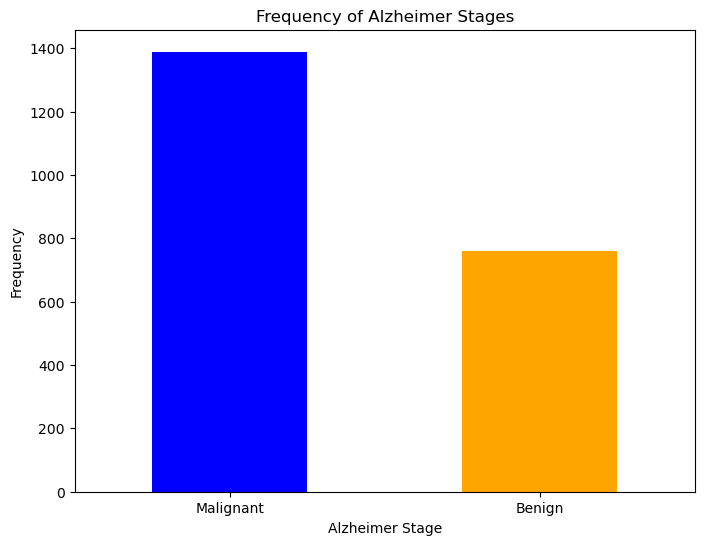

In [170]:
# Fréquence des stades du Alzheimer
frequency = data['Diagnosis'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
frequency.plot(kind='bar', color=['blue', 'orange'])
plt.title('Frequency of Alzheimer Stages')
plt.xlabel('Alzheimer Stage')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Malignant', 'Benign'], rotation=0)
plt.show()

# **Analyse diagnostique**

Ce graphique montre la répartition des diagnostics d'Alzheimer dans le dataset.  
L'axe des x représente les deux classes : **"Malignant"** (Alzheimer) et **"Benign"** (non Alzheimer).  
L'axe des y indique le nombre de patients dans chaque catégorie.  
On observe que la majorité des patients sont dans la classe **"Benign"** (non Alzheimer), tandis qu'une proportion plus faible est diagnostiquée **"Malignant"** (Alzheimer). 

Dans la suite, nous allons établir la corrélation entre les variables afin de réduire les variables qui présentent une forte dépendance entre elles. Nous allons effectuer cette analyse uniquement pour les group_demographics_lifestyle, puis nous le ferons pour les autres et nous verrons celle qui est le plus performant.

<Axes: >

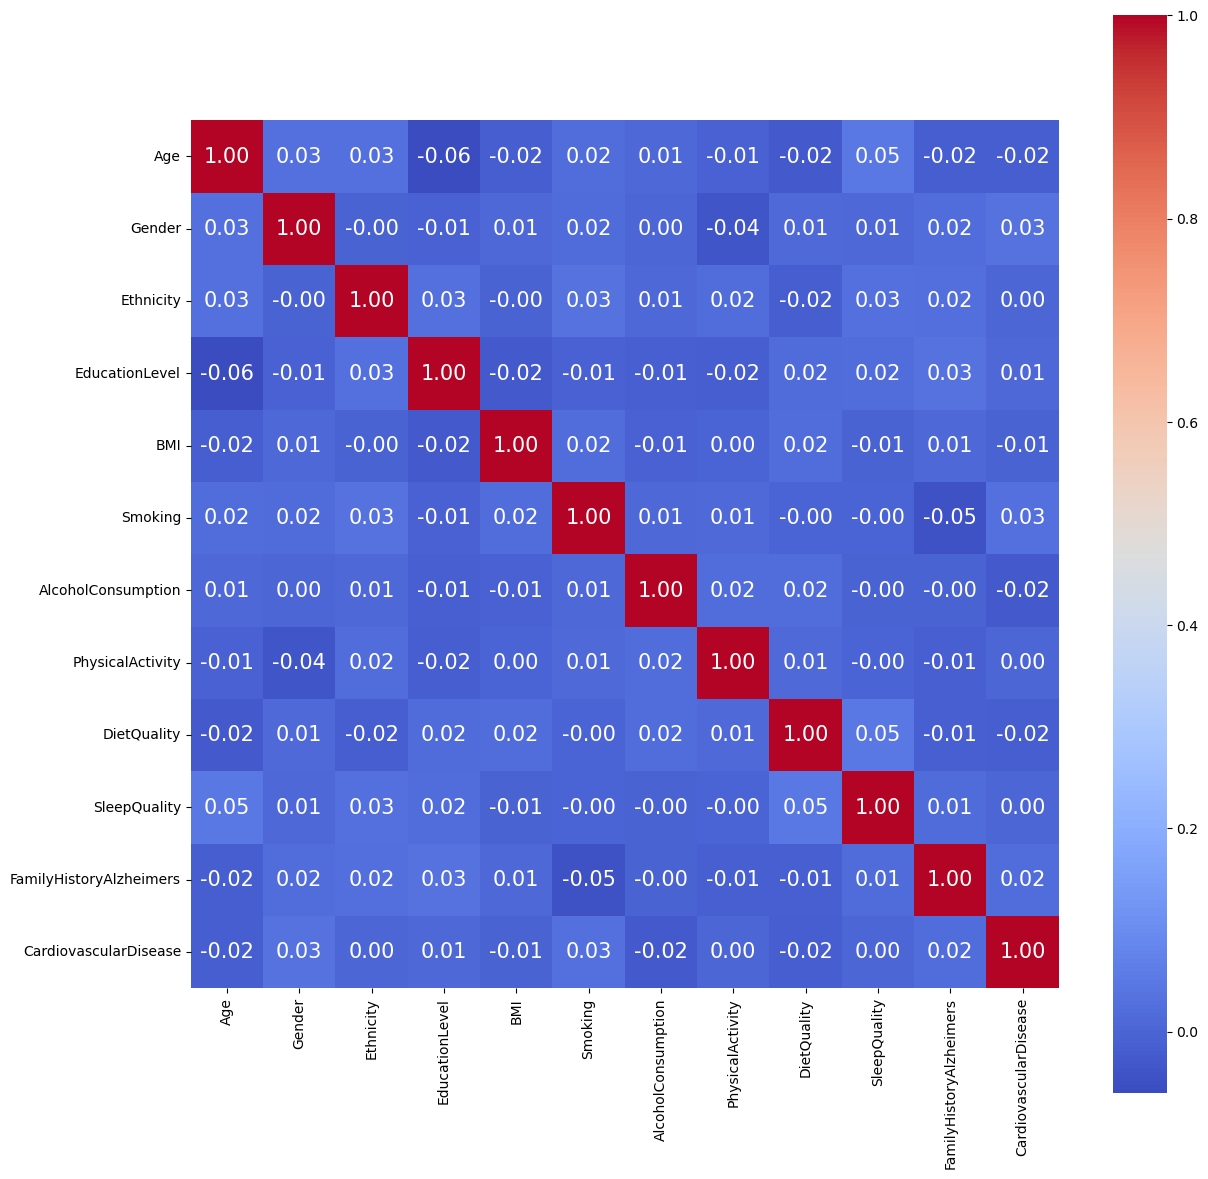

In [171]:
# Correlation
corr = data[group_demographics_lifestyle].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True, square=True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= group_demographics_lifestyle, yticklabels= group_demographics_lifestyle,
           cmap= 'coolwarm')

**Observation**

- La matrice de corrélation des variables démographiques et de mode de vie montre que la plupart des coefficients sont très proches de 0. Cela signifie qu'il n'existe pas de relation linéaire forte entre ces variables dans ce dataset. Autrement dit, chaque variable apporte une information relativement indépendante des autres.
- En résumé, les variables démographiques et de mode de vie sont relativement indépendantes les unes des autres dans ce dataset. Ainsi nous allons les maintenir toutes dans notre modèle.

In [229]:
prediction_var = group_demographics_lifestyle

Nous allons séparer nos données en données d'apprentissage et de test de validation

In [230]:
# Données d'apprentissage et test de validation
train, test = train_test_split(data, test_size = 0.3)

print(train.shape)
print(test.shape)

(1504, 33)
(645, 33)


# Analyse Prédictive

## Objectif de l'Analyse Prédictive

Dans cette section, nous allons développer et évaluer des modèles de machine learning pour prédire le diagnostic de la maladie d'Alzheimer à partir des variables sélectionnées.. 
L'objectif est de déterminer dans quelle mesure ces variables permettent d'anticiper la présence ou l'absence de la maladie.

Nous procéderons ainsi :
- Séparation des données en ensembles d'entraînement et de test pour valider la robustesse des modèles.
- Entraînement de différents algorithmes de classification (Random Forest, etc.) sur les données d'apprentissage.
- Prédiction du diagnostic sur l'ensemble de test.
- Évaluation des performances des modèles à l'aide de métriques telles que la précision.

Cette démarche permettra d'identifier les approches les plus efficaces pour la prédiction du diagnostic d'Alzheimer à partir des données disponibles.

In [231]:
# Entrainement
train_X = train[prediction_var]
train_y=train.Diagnosis

# Test
test_X= test[prediction_var] 
test_y =test.Diagnosis 

## Méhode des forêts aléatoires (Random Forest)

In [232]:
# n_estimators spécifie le nombre d'arbres de décision à créer dans la forêt. 
# Dans ce cas, nous créeons une forêt aléatoire avec 100 arbres de décision
model = RandomForestClassifier(n_estimators=100)

In [233]:
# Entraîner le modèle Random Forest sur les données d'apprentissage
model.fit(train_X,train_y)

RandomForestClassifier()

In [234]:
prediction=model.predict(test_X)   # Prediction pour les données de test

Nous utiliserons ici la mesure de la précision entre notre valeur prédite et les valeurs de sortie de notre test.

In [235]:
metrics.accuracy_score(prediction,test_y)

0.6124031007751938

## Méthode Support Vector Machine

In [236]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.6294573643410852

# Methode de Logistic Regression

In [237]:
model = LogisticRegression(max_iter=1000)
model.fit(train_X, train_y)
logreg_prediction = model.predict(test_X)
metrics.accuracy_score(logreg_prediction, test_y)

0.6294573643410852

Les scores de précision obtenus avec le SVM (Support Vector Machine) et le Random Forest sont respectivement de 0.637 et 0.617 pour chaque modèle. Cependant, ces résultats restent insuffisants pour garantir une prédiction fiable du diagnostic d'Alzheimer à partir des seules variables démographiques et de mode de vie. Afin d'améliorer la performance, il est nécessaire d'explorer d'autres algorithmes ou d'intégrer davantage de variables issues des groupes médicaux, cliniques et cognitifs. Nous allons donc tester avec les autres groupes de variables.


In [238]:
# prediction_var = group_medical_clinical
# prediction_var = group_demographics_lifestyle
# prediction_var = group_cognitive_symptoms
prediction_var = data.columns[20:28]

In [239]:
train_X= train[prediction_var]
train_y= train.Diagnosis
test_X = test[prediction_var]
test_y = test.Diagnosis

In [240]:
model=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=1)

model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9441860465116279

In [241]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp)

FunctionalAssessment        0.263446
ADL                         0.229730
MMSE                        0.171768
MemoryComplaints            0.111277
BehavioralProblems          0.075210
CholesterolTriglycerides    0.052312
CholesterolHDL              0.048356
CholesterolLDL              0.047902
dtype: float64


In [242]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.6294573643410852

In [243]:
prediction_var1 = data.columns[19:26]

train_X= train[prediction_var1]
train_y= train.Diagnosis
test_X = test[prediction_var1]
test_y = test.Diagnosis

model = LogisticRegression(max_iter=1000)
model.fit(train_X, train_y)
logreg_prediction = model.predict(test_X)
metrics.accuracy_score(logreg_prediction, test_y)

0.7612403100775194

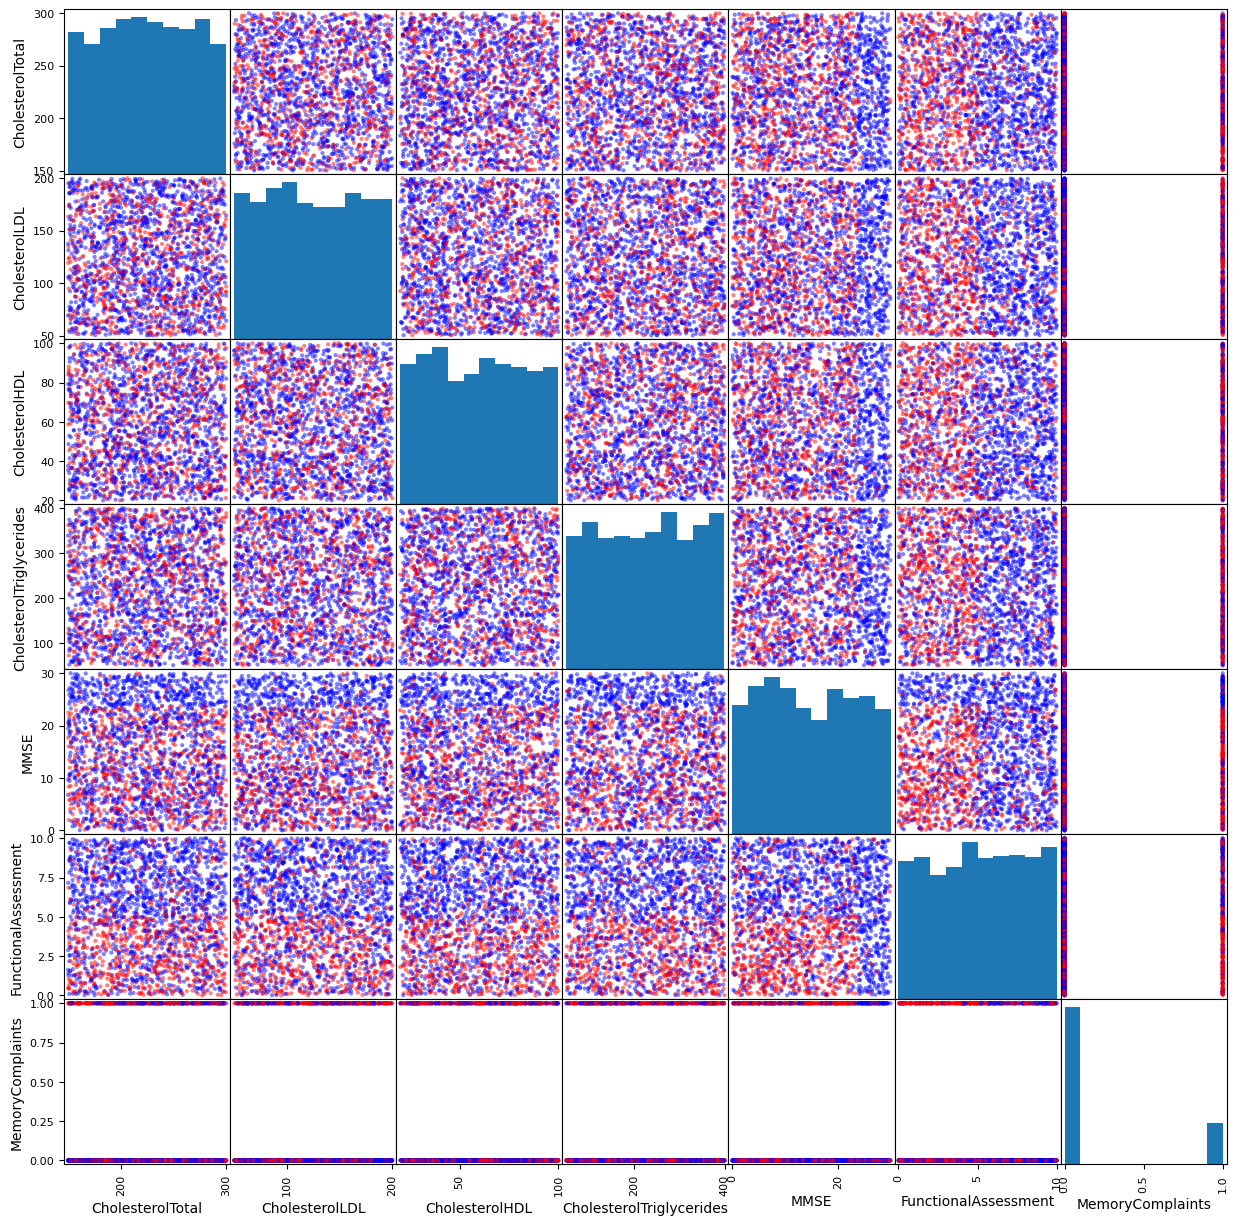

In [244]:
# Commençons avec l'analyse des données 
color_function = {0: "blue", 1: "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = data["Diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
pd.plotting.scatter_matrix(data[prediction_var1], c=colors, alpha = 0.5, figsize = (15, 15)); 